### Get a house with a full set of sensor info

In [2]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API/')

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

In [5]:
from IdealMetadataInterface import IdealMetadataInterface

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import plotly.graph_objects as go


In [8]:
import datetime

In [9]:
folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
mdi = IdealMetadataInterface(folder_path)  

##### I want to be able to see all columns in a row

In [10]:
pd.set_option('display.max_columns', None)

#### make a DF with just the electric appliances in it

In [11]:
def df_appliance(homeid):
    folder_path_appliances = '/Users/barry/CodeAcademy/Ideal_dataset/room_and_appliance_sensors/sensordata'
    ideal_appliances = IdealDataInterface(folder_path_appliances)
    view_df = ideal_appliances.view(homeid = homeid) #will allow us to get the sensorids
    df = pd.DataFrame() #creat an empty dataframe to store the electric info
    sensor_list = list(view_df[view_df.category == 'electric-appliance'].sensorid) #appliance sensor id's for the provided house
    if len(sensor_list) > 0: #DF only gets populated if there are monitored appliances
        electrics_appliance_info = ideal_appliances.get(sensorid = sensor_list) #appliance info as a list with extra infor
        for appliance in electrics_appliance_info: #cycle through the list importing it to the dataframe
            df[appliance['subtype']] = appliance['readings']
    else:
        print('no monitored appliances')
    try:
        df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df = df.fillna(0) # get rid of the NaN values
    except:
        pass
    return df
df_appliance(106)

Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


,kettle,microwave,fridgefreezer,washingmachine
time,,,,
2017-05-17 18:00:00,246,0.0,0.0,0.0
2017-05-17 19:00:00,0,0.0,0.0,0.0
2017-05-17 20:00:00,0,0.0,0.0,0.0
2017-05-17 21:00:00,0,0.0,0.0,0.0
2017-05-17 22:00:00,0,0.0,0.0,0.0
...,...,...,...,...
2018-06-14 07:00:00,0,0.0,0.0,0.0
2018-06-14 08:00:00,0,0.0,0.0,0.0
2018-06-14 09:00:00,0,0.0,0.0,0.0


# Lets get the main electric data

In [12]:
def df_dwelling(homeid):
    folder_path_dwelling = '/Users/barry/CodeAcademy/Ideal_dataset/sensordata'
    ideal_dwelling = IdealDataInterface(folder_path_dwelling)
    sensor_list = list(ideal_dwelling.view(homeid = homeid).sensorid)
    df_dwelling = pd.DataFrame() #creat an empty dataframe to store the electric info
    dwelling_info = ideal_dwelling.get(sensorid = sensor_list)
    if len(dwelling_info) > 0:
        for sensor in dwelling_info:
            df_dwelling[sensor['subtype']] = sensor['readings']
    else:
        print('no relevant dwelling sensors')
    try:
        df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df_dwelling = df_dwelling.fillna(0) # get rid of the NaN values
    except:
        pass
    return df_dwelling
    



In [13]:
def weather_getter(homeid): 
    folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
    mdi = IdealMetadataInterface(folder_path)     
    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    weather_location = home_info.location.iloc[0]
    print(weather_location)
    if weather_location == 'Edinburgh':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/edinburgh_weather.csv')
        
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Midlothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/midlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'WestLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/westlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'EastLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/eastlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Fife':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/kirkcaldy_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    

    else:
        print('weather_location_wrong')
    return weather_csv



In [14]:
weather_getter(100)

Midlothian


,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°)
time,,,,,
2016-06-01 00:00:00,9.7,90,2,10.7,40
2016-06-01 01:00:00,9.4,90,1,9.4,40
2016-06-01 02:00:00,9.0,90,1,8.7,42
2016-06-01 03:00:00,8.6,91,1,9.2,45
2016-06-01 04:00:00,8.4,91,1,9.5,37
...,...,...,...,...,...
2018-07-30 19:00:00,13.9,93,61,2.6,34
2018-07-30 20:00:00,14.0,95,3,6.9,219
2018-07-30 21:00:00,14.6,88,51,9.3,234


### combining my DFs

In [53]:
def df_combined(homeid):
    df_app = df_appliance(homeid)
    df_dw = df_dwelling(homeid)
    df_weather = weather_getter(homeid)
    df_combined = pd.concat([df_app, df_dw], axis = 1)
    merged_df = df_combined.join(df_weather, how = 'inner')
    if os.path.exists(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv'):
        print(f'file already exists for {homeid}')
    else:
        merged_df.to_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')
    # merged_df.columns = ['kettle', 'microwave', 'fridgefreezer', 'washingmachine',
    #    'hot-water-hot-pipe', 'hot-water-cold-pipe', 'gas', 'shower', 'mains',
    #    'cooker', 'electric-combined', 'central-heating-flow',
    #    'central-heating-return', 'temperature_2m',
    #    'relative_humidity_2m', 'weather_code',
    #    'wind_speed', 'wind_direction']
    merged_df['electric_combined_1h_lagged'] = merged_df['electric-combined'].shift(1)
    merged_df['electric_combined_1W_lagged'] = merged_df['electric-combined'].shift(128)
    merged_df['predicted_temperature_2m'] = merged_df['temperature_2m (°C)'].shift(-1)
    merged_df['predicted_weather_code'] = merged_df['weather_code (wmo code)'].shift(-1)
    merged_df['predicted_wind_speed'] = merged_df['wind_speed_10m (km/h)'].shift(-1)
    merged_df['predicted_wind_direction'] = merged_df['wind_direction_10m (°)'].shift(-1)
    merged_df['predicted_humidity'] = merged_df['relative_humidity_2m (%)'].shift(-1)
    merged_df['day'] = merged_df.index.day_name()
    merged_df['hour']= merged_df.index.hour
    if 'mains' in merged_df.columns:
        first_non_zero = merged_df['mains'].ne(0).idxmax()
        merged_df = merged_df.loc[first_non_zero:]
    else:
        pass
    merged_df = merged_df.iloc[5:]
    first_non_zero = merged_df['electric-combined'].ne(0).idxmax()
    merged_df = merged_df.loc[first_non_zero:]



    

    return merged_df

In [20]:
df_106 = df_combined(106)


Found entries for 4824 sensor readings.
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


Edinburgh
file already exists for 106


,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-17 14:00:00,NaN,NaN,NaN,NaN,70894,0.0,0.0,423.0,10738.0,0.0,60562.0,0.0,0.0,14.9,57,3,3.7,241,155649.0,29141.0,14.8,2,5.5,212,59,17,14
2017-05-17 15:00:00,NaN,NaN,NaN,NaN,64056,0.0,0.0,518.0,5798.0,2.0,28278.0,0.0,0.0,14.8,59,2,5.5,212,60562.0,91300.0,15.1,3,6.0,205,56,17,15
2017-05-17 16:00:00,NaN,NaN,NaN,NaN,58806,0.0,112.0,488.0,6514.0,3.0,30044.0,0.0,0.0,15.1,56,3,6.0,205,28278.0,20775.0,15.1,3,5.0,240,55,17,16
2017-05-17 17:00:00,NaN,NaN,NaN,NaN,72086,0.0,224.0,414.0,20482.0,9453.0,102564.0,0.0,0.0,15.1,55,3,5.0,240,30044.0,21884.0,14.5,51,4.1,285,64,17,17
2017-05-17 18:00:00,246.0,0.0,0.0,0.0,55230,0.0,0.0,436.0,4369.0,133.0,19911.0,0.0,0.0,14.5,64,51,4.1,285,102564.0,23322.0,13.7,51,3.4,288,74,17,18


In [17]:
df_106.head(10)

,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-13 10:00:00,NaN,NaN,NaN,NaN,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0,8.9,62,3,22.0,275,NaN,NaN,9.2,3,22.1,276,58,13,10
2017-04-13 11:00:00,NaN,NaN,NaN,NaN,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0,9.2,58,3,22.1,276,57887.0,NaN,10.4,3,24.9,273,58,13,11
2017-04-13 12:00:00,NaN,NaN,NaN,NaN,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0,10.4,58,3,24.9,273,66525.0,NaN,10.5,3,25.6,269,60,13,12
2017-04-13 13:00:00,NaN,NaN,NaN,NaN,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0,10.5,60,3,25.6,269,27318.0,NaN,10.7,3,26.4,265,58,13,13
2017-04-13 14:00:00,NaN,NaN,NaN,NaN,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0,10.7,58,3,26.4,265,70616.0,NaN,10.8,51,26.3,267,58,13,14
2017-04-13 15:00:00,NaN,NaN,NaN,NaN,48961,0.0,0.0,0.0,0.0,0.0,50601.0,0.0,0.0,10.8,58,51,26.3,267,280779.0,NaN,9.6,3,25.0,258,68,13,15
2017-04-13 16:00:00,NaN,NaN,NaN,NaN,54884,0.0,0.0,0.0,0.0,0.0,41735.0,0.0,0.0,9.6,68,3,25.0,258,50601.0,NaN,9.3,3,23.8,260,69,13,16
2017-04-13 17:00:00,NaN,NaN,NaN,NaN,58513,0.0,112.0,0.0,0.0,0.0,29716.0,0.0,0.0,9.3,69,3,23.8,260,41735.0,NaN,8.6,3,21.2,255,74,13,17
2017-04-13 18:00:00,NaN,NaN,NaN,NaN,51504,0.0,0.0,0.0,0.0,0.0,29711.0,0.0,0.0,8.6,74,3,21.2,255,29716.0,NaN,8.1,2,20.5,255,75,13,18


In [ ]:
df_106.tail()

### Lets have  a look at the DF to see if it accords to expectations

In [ ]:
df_106.head()




In [ ]:
df_106.tail()

In [ ]:
df_106.sample(20)

In [ ]:
list_home_ids = ['100', '101', '102', '105', '106', '107', '109', '110', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '129', '133', '134', '135', '136', '137', '138', '139', '140', '141', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '197', '199', '200', '201', '202', '203', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '218', '219', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '313', '315', '316', '317', '318', '319', '320', '321', '322', '323', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '47', '59', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '88', '89', '90', '91', '92', '93', '94', '96', '97', '98', '99']

In [ ]:
print(len(list_home_ids))

In [ ]:
count = 0
for val in list_home_ids:
    print(val)
    df_combined(int(val))
    count += 1
    print(count)

#### Need to check the metrics are consistent

#### Lets get the information from the home.csv

In [52]:
def home_info(homeid):

    #print('home_info')

    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    #display(home_info)

    appliance_list = ['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other']

    df_appliance = pd.DataFrame([0]*len(appliance_list), index=appliance_list).T
    appliance_info = mdi.metadata.appliances['appliance']
    appliance_info = appliance_info[appliance_info.homeid == homeid]
    for val in df_appliance.columns:
        if val in list(appliance_info.appliancetype):
            df_appliance[val]= 1
        else:
            df_appliance[val] = 0
    #display(df_appliance)


    #print('weather center')
    location_info = mdi.metadata.locations['location']
    location = home_info.location.iloc[0]
    location_info = location_info[location_info.locationid == location]
    #display(location_info)


    #print('people info')
    people_info = mdi.metadata.people['person']
    people_info = people_info[people_info.homeid == homeid].reset_index()
    #display(people_info)

    #print('tariff info')
    df_tariff = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/tariff.csv')
    #display(df_tariff[(df_tariff.homeid == homeid) & (df_tariff.energytype == 'electricity')])

    #print('meter reading')
    df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
    #display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])    

    room_info = mdi.metadata.rooms['room']
    room_info = room_info[room_info.homeid == homeid]
    #display(room_info[room_info.homeid == homeid])

    room_info_condensed = pd.DataFrame({'number_of_rooms': [len(room_info)]})
    room_info_condensed['sqm'] = room_info.floorarea.sum()
    #display(room_info_condensed)
    df_all = pd.merge(home_info, df_appliance, left_index=True, right_index=True) 
    df_all = pd.merge(df_all, location_info, left_index=True, right_index=True)
    df_all = pd.merge(df_all, people_info, left_index=True, right_index=True)


    display(df_all)
    display(df_all.shape)




home_info(106)

,index_x,homeid_x,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,hometype,equivalised_income,occupancy,urban_rural_class,urban_rural_name,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying,fridgefreezer,grill,toaster,kettle,electricoven,washingmachine,freezer,fridge,microwave,dishwasher,vacuumcleaner,electrichob,washingmachinetumbledrier,electricshower,electricheater,tumbledrier,dehumidifier,other,locationid,weather_centre,index_y,personid,homeid_y,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,43,106,enhanced,Edinburgh,1,13/04/2017 03:00,17/05/2017 03:00,14/06/2018 11:30,enhanced_20170614,"£32,400 to £37,799",enhanced,flat,above_median,single,1,Large Urban Areas,1991-1995,NaN,Don't own,Don't own,2,5,2nd,Yes - shared with neighbours,No,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,Edinburgh,Edinburgh,102,723,106,1,NaN,Female,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",21.0,1,2017-04-13,0


(1, 59)

In [ ]:
df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])



In [27]:

appliance_info = mdi.metadata.appliances['appliance'][mdi.metadata.appliances['appliance'].powertype == 'electric'].appliancetype.unique()
display(appliance_info)


array(['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other'], dtype=object)

In [ ]:
mdi.metadata.locations.location

In [ ]:
df_106 = df_dwelling(106)

In [ ]:
df_106.head(1)

In [ ]:
start_date = pd.to_datetime('2017-06-01')
end_date = pd.to_datetime('2018-06-01')
df_106_year = df_106.loc[start_date:end_date]

In [ ]:
df_106_year.head(10)

In [ ]:
df_106_year.index

In [ ]:
import matplotlib.dates as mdates


In [ ]:
df_106.head()

In [53]:
def hourly_consumption(df, homeid =None):
    fig, ax = plt.subplots(figsize = (35, 5))
    sns.lineplot(data = df, x = df.index, y = 'electric-combined', ax = ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.legend(['mains'])
    fig.suptitle(f'Hourly electricity consumption for home {homeid}')
        # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    # Draw a horizontal line at the average consumption
    ax.axhline(y=average_consumption, color='r', linestyle='--')



    plt.show()

    average_consumption = df['electric-combined'].mean()
    display(f'average daily consumption: {average_consumption}')


In [22]:
def hourly_consumption2(df, homeid=None):
    # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    fig = go.Figure()

    # Add line plot
    fig.add_trace(go.Scatter(x=df.index, y=df['electric-combined'], mode='lines', name='mains'))

    # Add horizontal line at the average consumption
    fig.add_shape(type="line",
                  x0=df.index.min(), y0=average_consumption,
                  x1=df.index.max(), y1=average_consumption,
                  line=dict(color="Red", width=2, dash="dash"))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_title="Date",
        yaxis_title="Electric Combined",
        autosize=False,
        width=1000,
        height=500,
        xaxis=dict(
            tickformat="%Y-%m-%d %H:%M"  # Display x-axis labels in the format "Year-Month-Day Hour:Minute"
        )
    )

    fig.show()

    print(f'average daily consumption: {average_consumption}')

In [23]:
hourly_consumption2(df_106, 106)

average daily consumption: 45997.1887592789


In [ ]:
hourly_consumption(df_106)

In [56]:
def heatmap(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_data, cmap = 'Oranges')
    plt.suptitle(f'Hourly electricity consumption for home {homeid}')
    plt.show()


In [24]:

def heatmap2(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')

    fig = go.Figure(data=go.Heatmap(
                   z=pivot_data.values,
                   x=pivot_data.columns,
                   y=pivot_data.index,
                   colorscale='Oranges',
                   hovertemplate='Day: %{y}<br>Time: %{x}<br>Value: %{z}<extra></extra>'
                   ))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_nticks=36,
        width=800,
        height = 800,
        xaxis_title="Hour of the day",
        yaxis_title = 'Date')

    fig.show()

In [25]:
heatmap2(df_106)

In [ ]:
#lets get a graph showing the number of hours producing
display(df_106.head())

In [64]:
df_106['electric-combined'].max()

1156703.0

In [28]:
def bin_builder(df):
    count_under_10000 = df[(df['electric-combined'] < 10000)].gas.count()
    count_between_10000_20000 = df[(df['electric-combined'] >= 10000) & (df['electric-combined'] < 20000)].gas.count()
    count_between_20000_30000 = df[(df['electric-combined'] >= 20000) & (df['electric-combined'] < 30000)].gas.count()
    count_between_30000_40000 = df[(df['electric-combined'] >= 30000) & (df['electric-combined'] < 40000)].gas.count()
    count_between_40000_50000 = df[(df['electric-combined'] >= 40000) & (df['electric-combined'] < 50000)].gas.count()
    count_between_50000_60000 = df[(df['electric-combined'] >= 50000) & (df['electric-combined'] < 60000)].gas.count()
    count_between_60000_70000 = df[(df['electric-combined'] >= 60000) & (df['electric-combined'] < 70000)].gas.count()
    count_between_70000_80000 = df[(df['electric-combined'] >= 70000) & (df['electric-combined'] < 80000)].gas.count()

 
    count_over_80000 = df[(df['electric-combined'] >= 80000)].gas.count()
    bins = [count_under_10000, count_between_10000_20000, count_between_20000_30000, count_between_30000_40000, count_between_40000_50000,count_between_50000_60000,count_between_60000_70000,count_between_70000_80000, count_over_80000]
    return bins

In [58]:
# def bin_builder(df):
#     count_under_50 = df[(df['electric-combined'] < 50)].gas.count()
#     count_between_50_100 = df[(df['electric-combined'] >= 50) & (df['electric-combined'] < 100)].gas.count()
#     count_between_100_150 = df[(df['electric-combined'] >= 100) & (df['electric-combined'] < 150)].gas.count()
#     count_between_150_200 = df[(df['electric-combined'] >= 150) & (df['electric-combined'] < 200)].gas.count()
#     count_between_200_300 = df[(df['electric-combined'] >= 200) & (df['electric-combined'] < 300)].gas.count()
#     count_between_300_400 = df[(df['electric-combined'] >= 300) & (df['electric-combined'] < 400)].gas.count()
#     count_between_400_500 = df[(df['electric-combined'] >= 400) & (df['electric-combined'] < 500)].gas.count()
#     count_between_500_750 = df[(df['electric-combined'] >= 500) & (df['electric-combined'] < 750)].gas.count()
#     count_between_750_1000 = df[(df['electric-combined'] >= 750) & (df['electric-combined'] < 1000)].gas.count()
#     count_between_1000_1500 = df[(df['electric-combined'] >= 1000) & (df['electric-combined'] < 1500)].gas.count()
#     count_between_1500_2000 = df[(df['electric-combined'] >= 1500) & (df['electric-combined'] < 2000)].gas.count()
#     count_over_2000 = df[(df['electric-combined'] >= 2000)].gas.count()
#     bins = [count_under_50, count_between_50_100, count_between_100_150, count_between_150_200, count_between_200_300, count_between_300_400, count_between_400_500, count_between_500_750, count_between_750_1000, count_between_1000_1500, count_between_1500_2000, count_over_2000]
#     return bins

In [26]:
def power_hour_count(df, homeid=None):

    bins = bin_builder(df)


    counts = {
        'count_under_10000': bins[0],
        'count_between_10000_20000': bins[1],
        'count_between_20000_30000': bins[2],
        'count_between_30000_40000': bins[3],
        'count_between_40000_50000': bins[4],
        'count_between_50000_60000': bins[5],
        'count_between_60000_70000': bins[6],
        'count_between_70000_80000':bins[7],
        'count_over_80000': bins[7]
    }

    # Convert the dictionary to a pandas DataFrame
    df_counts = pd.DataFrame(list(counts.items()), columns=['Range', 'Count'])

    # Create the barplot
    sns.barplot(x='Count', y='Range', data=df_counts)
    plt.title('Number of hours where electricity consumption falls within a given range')

    for i in range(df_counts.shape[0]):
        plt.text(df_counts.Count[i], i, df_counts.Count[i], va='center')

       # Calculate the average
    avg = df_counts['Count'].mean()

    # Draw a vertical line at the average point
    plt.axvline(x=avg, color='r', linestyle='--')



    # Show the plot
    plt.show()

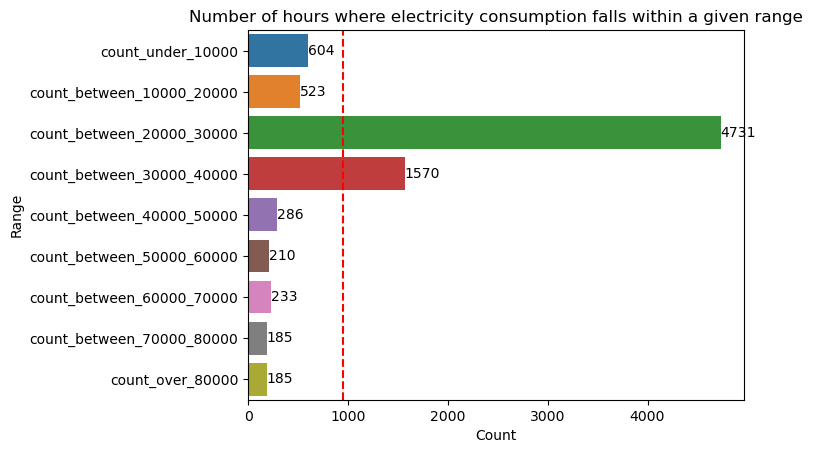

In [29]:
power_hour_count(df_106)

In [ ]:
power_hour_count(df_106)

In [30]:
def isolate_peak(df):
    df_peak = df[df['electric-combined'] > 70000]
    return df_peak

In [31]:
df_106_peak = isolate_peak(df_106)

In [32]:
def day_consumption(df):
    sns.boxplot(data = df, x = df.index.day_name(), y = 'electric-combined')
    plt.show()

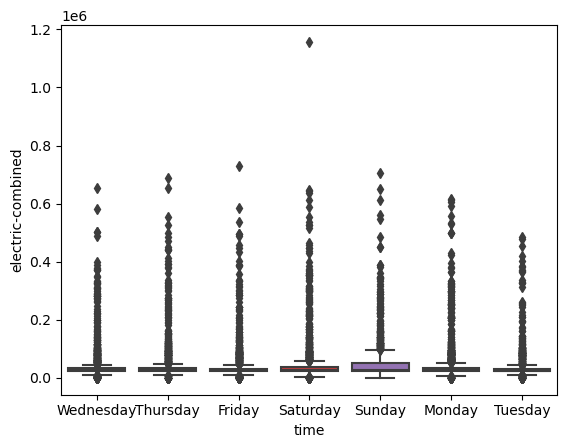

In [33]:
day_consumption(df_106)

In [34]:
def peak_season_breakdown(df, ax=None, homeid =None):
    df['season'] = df.index.to_series().dt.month%12 // 3 + 1

    season_counts = df['season'].value_counts().sort_index()

    # Calculate percentages
    season_percentages = pd.DataFrame(season_counts / df.shape[0] * 100)
    fig = season_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Season'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/159411260.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

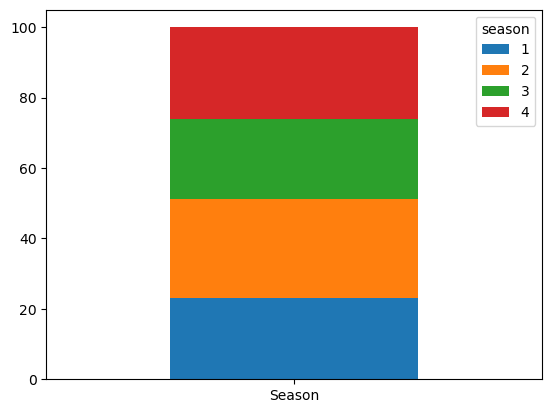

In [35]:
peak_season_breakdown(df_106_peak)

In [36]:
def peak_day_breakdown(df, ax=None, homeid=None):
    df['day_of_week'] = df.index.to_series().dt.dayofweek
    df['day_of_week'] = df.day_of_week.apply(lambda x: 'M' if x == 0 else 'T' if x == 1 else 'W' if x == 2 else 'Th' if x == 3 else 'F' if x == 4 else 'S' if x == 5 else 'Su' if x == 6 else x)

    day_of_week_counts = df['day_of_week'].value_counts().sort_index()


    # Calculate percentages
    day_of_week_percentages = pd.DataFrame(day_of_week_counts / df.shape[0] * 100)
    fig = day_of_week_percentages.T.plot(kind='bar',stacked=True, ax=ax)
    fig.set_xticklabels(['Day of week'], rotation=0)
    if ax is not None:
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
    


    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

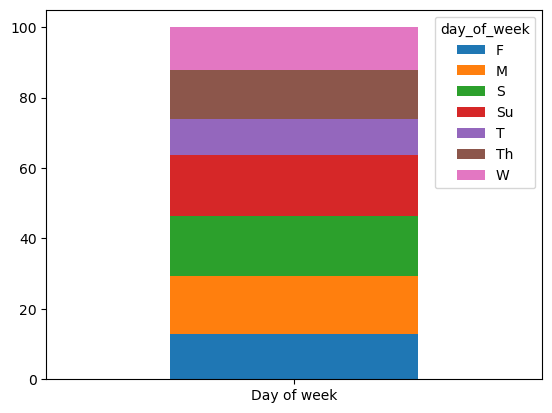

In [37]:
peak_day_breakdown(df_106_peak)

In [38]:
def peak_time_of_day(df, ax=None, homeid =None):
    def get_part_of_day(hour):
        return (
            "morning" if 5 <= hour <= 11
            else
            "afternoon" if 12 <= hour <= 17
            else
            "evening" if 18 <= hour <= 22
            else
            "night"
        )

    df['part_of_day'] = df.index.to_series().dt.hour.apply(get_part_of_day)

    part_of_day_counts = df['part_of_day'].value_counts().sort_index()

    # Calculate percentages
    part_of_day_percentages = pd.DataFrame(part_of_day_counts / df.shape[0] * 100)

    fig = part_of_day_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Time of day'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)



    return fig



In [39]:
def peak_combined_breakdown(df, homeid=None):

    fig, axs = plt.subplots(1, 3, figsize=(8, 5))
    peak_time_of_day(df, ax=axs[0])
    peak_day_breakdown(df, ax=axs[1])
    peak_season_breakdown(df, ax=axs[2])
    fig.suptitle('Peak electricity consumption breakdown')
    fig.text(0.5, 1,'hours with consumption over 1000', ha='center', va='top')
    plt.tight_layout()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/2676000693.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

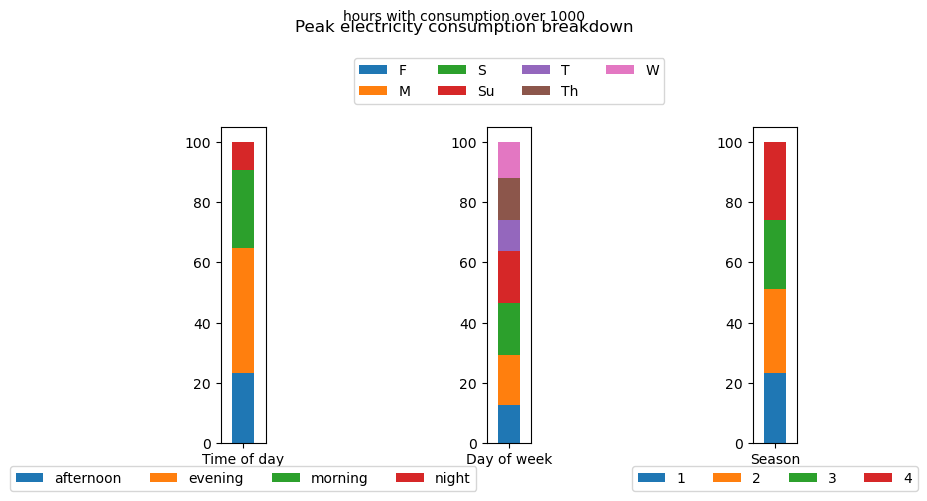

In [40]:
peak_combined_breakdown(df_106_peak)

In [41]:
def house_breakdown(homeid):
    df = df_combined(homeid)
    homeid = str(homeid)
    power_hour_count(df, homeid)
    hourly_consumption2(df, homeid)
    heatmap2(df, homeid)
    peak_combined_breakdown(df,homeid)
    
    
   

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 82


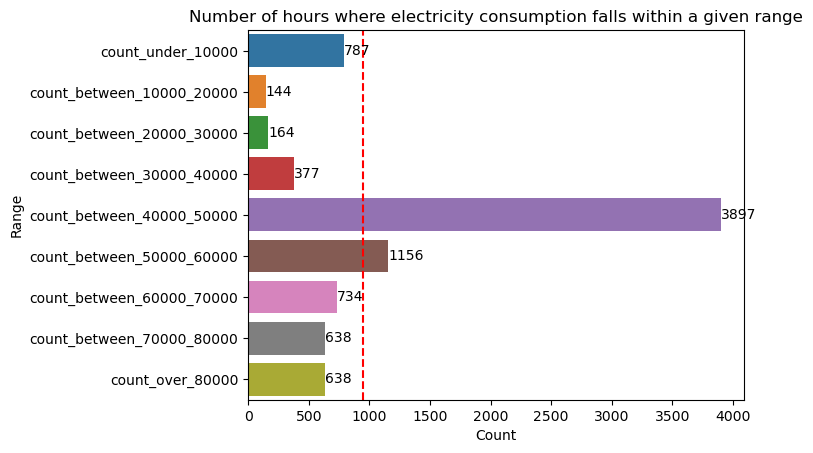

average daily consumption: 94222.72739007664


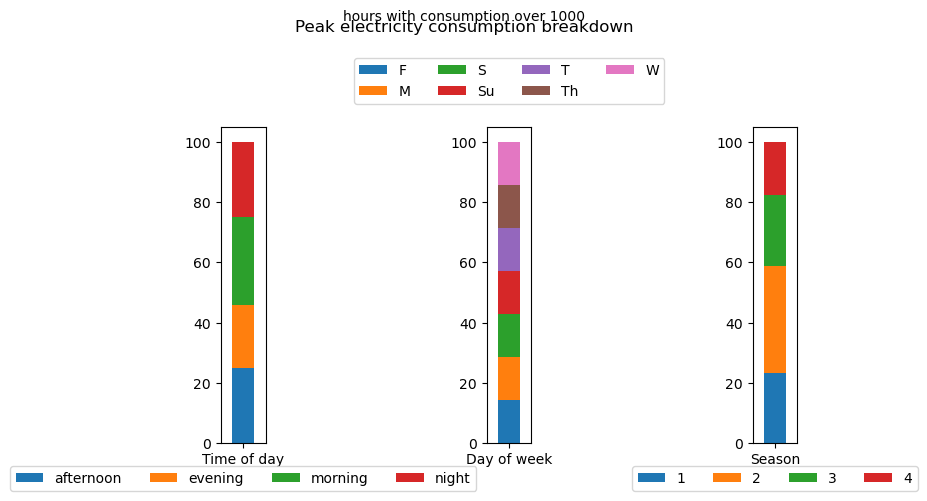

In [51]:
house_breakdown(82)

In [54]:
df_82 = df_combined(82)

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 82


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2100/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [55]:
display(df_82.head(20))

,hot-water-cold-pipe,hot-water-hot-pipe,gas,central-heating-flow,central-heating-return,electric-combined,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,
2017-01-30 13:00:00,13440,30392,0.0,0.0,0.0,17103.0,5.3,80,3,17.1,134,0.0,0.0,5.1,3,14.1,109,84,Monday,13
2017-01-30 14:00:00,56265,84800,948.0,34122.0,28985.0,117811.0,5.1,84,3,14.1,109,17103.0,0.0,5.1,3,9.9,109,85,Monday,14
2017-01-30 15:00:00,57955,72262,0.0,74916.0,65165.0,301734.0,5.1,85,3,9.9,109,117811.0,0.0,4.8,3,11.0,113,88,Monday,15
2017-01-30 16:00:00,53215,63330,0.0,0.0,0.0,159785.0,4.8,88,3,11.0,113,301734.0,0.0,4.6,3,16.3,112,88,Monday,16
2017-01-30 17:00:00,53415,61333,316.0,0.0,0.0,267911.0,4.6,88,3,16.3,112,159785.0,0.0,4.4,3,13.6,122,89,Monday,17
2017-01-30 18:00:00,51685,59433,0.0,0.0,0.0,196423.0,4.4,89,3,13.6,122,267911.0,0.0,4.2,3,12.9,117,89,Monday,18
2017-01-30 19:00:00,50980,56994,0.0,0.0,0.0,329488.0,4.2,89,3,12.9,117,196423.0,0.0,4.0,3,13.6,122,88,Monday,19
2017-01-30 20:00:00,45195,49821,632.0,0.0,0.0,181155.0,4.0,88,3,13.6,122,329488.0,0.0,3.8,3,12.9,120,88,Monday,20
2017-01-30 21:00:00,26580,29494,316.0,0.0,0.0,87697.0,3.8,88,3,12.9,120,181155.0,0.0,3.5,3,8.8,109,88,Monday,21
